In [1]:
suppressMessages(source("../config_sing.R"))

You are in singularity_proj_encode_fcc 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


In [15]:
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "fragment")
dir(fdiry)

[1] "library_size.txt"                       
[2] "Tile_K562_20210130.GATA1.unstranded.bed"

In [16]:
### init: file directory
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "fragment")
fname = "Tile_K562_20210130.GATA1.unstranded.bed"
fpath = file.path(fdiry, fname)

### init: data type
cnames = c("Chrom", "Start", "End", "Name")
ctypes = c(col_character(), col_integer(), col_integer(), col_character())

### read data
dat = read_tsv(
    fpath, 
    col_types = ctypes, 
    col_names = cnames)
dat = dat %>% mutate(Length = End - Start)
dat_mpra = dat

In [17]:
head(dat_mpra)

Chrom,Start,End,Name,Length
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chrX,47786401,47786600,X:47786401-47786600,199
chrX,47786451,47786650,X:47786451-47786650,199
chrX,47786501,47786700,X:47786501-47786700,199
chrX,47786551,47786750,X:47786551-47786750,199
chrX,47786601,47786800,X:47786601-47786800,199
chrX,47786651,47786850,X:47786651-47786850,199


In [11]:
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "fragment")
dir(fdiry)

[1] "KS91_K562_hg38_ASTARRseq_Input_rep1.GATA1.unstranded.dedups.bed"
 [2] "KS91_K562_hg38_ASTARRseq_Input_rep2.GATA1.unstranded.dedups.bed"
 [3] "KS91_K562_hg38_ASTARRseq_Input_rep3.GATA1.unstranded.dedups.bed"
 [4] "KS91_K562_hg38_ASTARRseq_Input_rep4.GATA1.unstranded.dedups.bed"
 [5] "KS91_K562_hg38_ASTARRseq_Input_rep5.GATA1.unstranded.dedups.bed"
 [6] "KS91_K562_hg38_ASTARRseq_Input_rep6.GATA1.unstranded.dedups.bed"
 [7] "KS91_K562_hg38_ASTARRseq_Output_rep1.GATA1.unstranded.bed"      
 [8] "KS91_K562_hg38_ASTARRseq_Output_rep2.GATA1.unstranded.bed"      
 [9] "KS91_K562_hg38_ASTARRseq_Output_rep3.GATA1.unstranded.bed"      
[10] "KS91_K562_hg38_ASTARRseq_Output_rep4.GATA1.unstranded.bed"      
[11] "library_size.tsv"                                               
[12] "library_size.txt"

In [38]:
### init: file directory
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "fragment")
fname = "KS91_K562_hg38_ASTARRseq_Input_rep1.GATA1.unstranded.dedups.bed"
fpath = file.path(fdiry, fname)

### init: data type
cnames = c("Chrom", "Start", "End", "Name")
ctypes = c(col_character(), col_integer(), col_integer(), col_character())

### read data
dat = read_tsv(
    fpath, 
    col_types = ctypes, 
    col_names = cnames)
dat = dat %>% mutate(Length = End - Start)
dat_astarr_inp = dat
head(dat_astarr_inp)

Chrom,Start,End,Name,Length
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chrX,47787165,47787363,chrX_47787165_47787363,198
chrX,47787557,47787773,chrX_47787557_47787773,216
chrX,47787593,47787783,chrX_47787593_47787783,190
chrX,47787598,47787772,chrX_47787598_47787772,174
chrX,47787661,47788058,chrX_47787661_47788058,397
chrX,47787743,47787849,chrX_47787743_47787849,106


In [39]:
### init: file directory
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "fragment")
fname = "KS91_K562_hg38_ASTARRseq_Output_rep1.GATA1.unstranded.bed"
fpath = file.path(fdiry, fname)

### init: data type
cnames = c("Chrom", "Start", "End", "Name")
ctypes = c(col_character(), col_integer(), col_integer(), col_character())

### read data
dat = read_tsv(
    fpath, 
    col_types = ctypes, 
    col_names = cnames)
dat = dat %>% mutate(Length = End - Start)
dat_astarr_out = dat
head(dat_astarr_out)

Chrom,Start,End,Name,Length
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chrX,47787189,47787363,chrX_47787189_47787363,174
chrX,47787189,47787363,chrX_47787189_47787363,174
chrX,47787189,47787363,chrX_47787189_47787363,174
chrX,47787189,47787363,chrX_47787189_47787363,174
chrX,47787189,47787363,chrX_47787189_47787363,174
chrX,47787189,47787363,chrX_47787189_47787363,174


Warning message:
“Removed 91 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


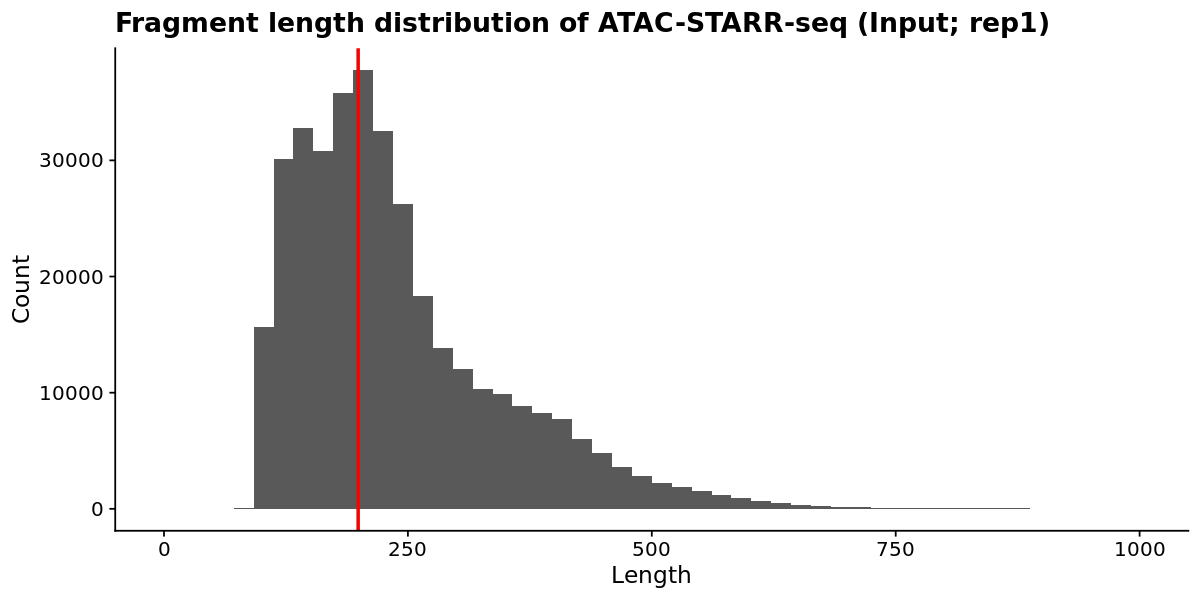

In [40]:
dat = dat_astarr_inp
gpt = ggplot(dat, aes(x=Length)) + 
    geom_histogram(bins=50) + 
    geom_vline(xintercept = 199, size=1, color="red") + 
    theme_cowplot() + 
    xlim(0, 1000) +
    labs(x="Length", y="Count", title="Fragment length distribution of ATAC-STARR-seq (Input; rep1)")

options(repr.plot.width=10, repr.plot.height=5)
print(gpt)

Warning message:
“Removed 95 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


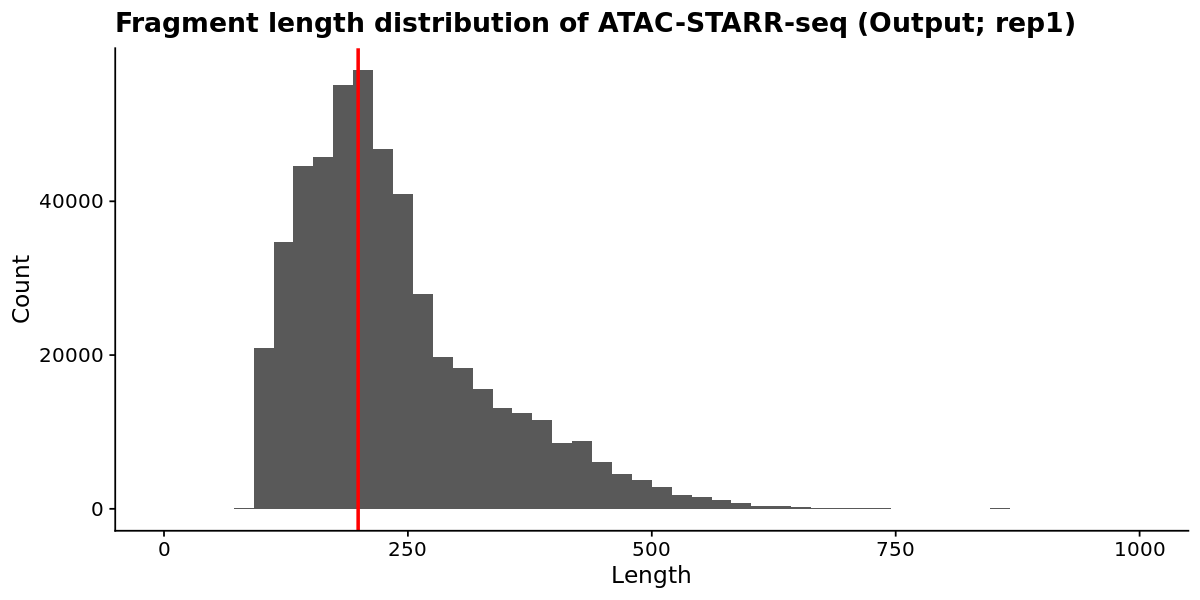

In [41]:
dat = dat_astarr_out
gpt = ggplot(dat, aes(x=Length)) + 
    geom_histogram(bins=50) + 
    geom_vline(xintercept = 199, size=1, color="red") + 
    theme_cowplot() + 
    xlim(0, 1000) +
    labs(x="Length", y="Count", title="Fragment length distribution of ATAC-STARR-seq (Output; rep1)")

options(repr.plot.width=10, repr.plot.height=5)
print(gpt)